In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

vidcap = cv2.VideoCapture("../data_extracted/videos/training1.mp4")

fps = int(vidcap.get(cv2.CAP_PROP_FPS))
frameCount = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [76]:
previous_histogram = None


count = 0
success = True
frame_index = 0
scores = []

def extract_timestamp(prev_hist, cur_hist, threshold, method, frame_numb):
#     score = cv2.compareHist(prev_hist, cur_hist, method)

#     threshold_asses = False
#     timestamp = None
#     if method is cv2.HISTCMP_CHISQR:
#         threshold_asses = score > threshold
#         timestamp = int(frame_numb/fps)
    
#     if method is cv2.HISTCMP_CORREL:
#         threshold_asses = score < threshold
#         timestamp = int(frame_numb / fps)
    
#     return threshold_asses, timestamp
    score = cv2.compareHist(prev_hist, cur_hist, method)
    return score

chuncksize = 5

while success:
    frame_index += 1

    success, image = vidcap.read()
    if count != (chuncksize * fps):
        count += 1
    elif frame_index > frameCount:
        break
    else:
        count = 0

        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

        if previous_histogram is None:
            previous_histogram = histogram
            count += 1
            continue

        score = cv2.compareHist(previous_histogram, histogram, cv2.HISTCMP_CHISQR)

        scores.append(score)

        previous_histogram = histogram

        if cv2.waitKey(10) == 27:  # exit if Escape is hit
            break

In [77]:
len(scores), frameCount, frame_index

(800, 237216, 237125)

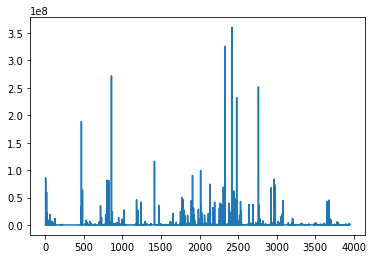

In [70]:
import pandas as pd
from scipy import stats


scores_serie = pd.Series(scores)
z_score = stats.zscore(scores_serie)
fitted = scores_serie.loc[np.abs(z_score)<=3]
plt.plot(fitted)

In [71]:
len(scores), len(fitted)

(3951, 3948)

In [109]:
metadata = pd.read_csv("../data_raw/metadata.csv")
highlights = metadata[(metadata["type"] == "highlight") & (metadata["perspective"]=="P11")]
h_df = highlights[highlights["match_id"]==1]

In [89]:
start_steam_time = metadata[(metadata["match_id"]==1) & (metadata["perspective"]=="P11") & (metadata["type"]=="match")]["stream_timestamp"]

In [98]:
from datetime import datetime
template = "%H:%M:%S"
start_time = datetime.strptime(start_steam_time.values[0], template)

In [108]:
start_time

datetime.datetime(1900, 1, 1, 0, 41, 26)

In [111]:
h_df[["duration","stream_timestamp"]]

,duration,stream_timestamp
12,60,01:19:24
13,45,01:23:32
14,81,01:45:54


In [112]:
timestamps = []
for i in range(3):
    timestamp = datetime.strptime(h_df["stream_timestamp"].values[i], template) - start_time
    timestamps.append(timestamp)

In [113]:
timestamps

[datetime.timedelta(seconds=2278),
 datetime.timedelta(seconds=2526),
 datetime.timedelta(seconds=3868)]

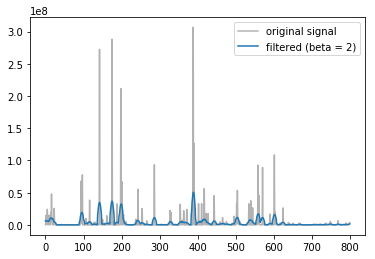

In [122]:
import matplotlib.pylab
# random data generation
y = np.random.random(100)*100 
y =scores

# for i in range(100):
#     y[i]=y[i]+i**((150-i)/80.0) # modifies the trend
beta = [2]
def smooth(x,beta):
    """ kaiser window smoothing """
    window_len=11
    # extending the data at beginning and at the end
    # to apply the window at the borders
    s = np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    w = np.kaiser(window_len,beta)
    y = np.convolve(w/w.sum(),s,mode='valid')
    return y[5:len(y)-5]

# smoothing the data
plt.figure(1)
plt.plot(y,'-k',label="original signal",alpha=.3)
for b in beta:
    yy = smooth(y,b) 
    plt.plot(yy,label="filtered (beta = "+str(b)+")")
plt.legend()
plt.show()